### Common Section

In [1]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.cluster import DBSCAN
import mplcursors

In [2]:
dt_vec = np.load("./vectors2.npy")
with open("./commits2.pkl","rb") as f:
    dt_commit = pickle.load(f)

In [3]:
ma_vec = np.load("../Diffs_malicious/mvectors2.npy")
with open("../Diffs_malicious/mcommits2.pkl","rb") as f:
    ma_commit = pickle.load(f)

In [68]:
# # preprocess: normalize all dimensions
# dt_vec = dt_vec.astype(np.float)
# dr, dc = dt_vec.shape
# for i in range(dc):
#     dmax = max(dt_vec[:,i])
#     if dmax==0:
#         continue
#     else:
#         dt_vec[:,i] = dt_vec[:,i]/dmax

### SparsePCA + K-Means

**1. Do a SparsePCA to translate the discrete vector to real one (with 2 dimensions).**

In [4]:
sparse_pca = SparsePCA(n_components=2)
sparse_pca.fit(dt_vec)

/Users/joseph/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


SparsePCA(U_init=None, V_init=None, alpha=1, max_iter=1000, method='lars',
     n_components=2, n_jobs=None, normalize_components=False,
     random_state=None, ridge_alpha=0.01, tol=1e-08, verbose=False)

In [5]:
sparse_vec = sparse_pca.transform(dt_vec)

**2. Then use the K-Means to cluster the data points into 7 clusters. You can choose the number of clusters based on the visualization result later.**

In [6]:
kmeans = KMeans(n_clusters=7).fit(sparse_vec)
y_kmeans = kmeans.predict(sparse_vec)

In [7]:
y_dist = {}
for i in range(len(dt_commit)):
    if y_kmeans[i] not in y_dist.keys():
        y_dist[y_kmeans[i]] = []
    y_dist[y_kmeans[i]].append(dt_commit[i])

In [8]:
list(y_dist.keys())

[0, 3, 5, 1, 6, 2, 4]

In [9]:
[len(y_dist[p]) for p in y_dist.keys()]

[16574, 2, 49, 9, 18, 10, 3]

**3. Plot the visualization results.**

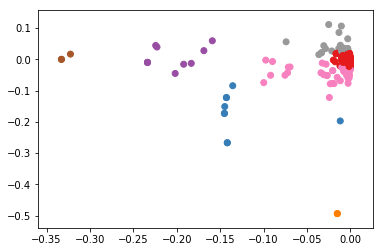

In [10]:
plt.scatter(sparse_vec[:,0],sparse_vec[:,1],c=y_kmeans,cmap=plt.cm.Set1)
plt.show()

**4. Compute the self-defined distance and re-rank the data points.**

In [11]:
kmeans.cluster_centers_

array([[-5.54873480e-05, -1.20360731e-04],
       [-1.27864726e-01, -1.72944876e-01],
       [-2.05314193e-01,  6.89084398e-03],
       [-1.49064782e-02, -4.93640354e-01],
       [-3.29479698e-01,  5.65775098e-03],
       [-2.20112855e-02, -4.35227224e-02],
       [-2.02091367e-02,  4.58124839e-02]])

In [12]:
# distance.euclidean([1,0],[0,1])

In [13]:
cluster_size = [len(y_dist[p]) for p in y_dist.keys()]
mdistances = []
mr, mc = sparse_vec.shape
for i in range(mr):
    tmp_dist = 0.
    for j in range(7):
        tmp_dist += cluster_size[j]/sum(cluster_size) * distance.euclidean(sparse_vec[i,:],kmeans.cluster_centers_[j])
    mdistances.append((i,tmp_dist))

In [14]:
sorted_d = sorted(mdistances, key=lambda p:p[1], reverse=True)

In [15]:
sorted_d[:20]

[(234, 0.49366733976714483),
 (339, 0.49366733976714483),
 (14748, 0.33203934694213993),
 (16029, 0.33203934694213993),
 (13338, 0.3221484114153487),
 (14545, 0.3019295936548677),
 (15568, 0.3019295936548677),
 (12616, 0.2332696998568863),
 (14626, 0.2332696998568863),
 (15191, 0.2332696998568863),
 (13351, 0.22812565028799328),
 (13257, 0.22574074988503592),
 (13502, 0.22554024474968987),
 (16410, 0.22554024474968987),
 (13902, 0.2089316710751613),
 (13977, 0.2063209212769408),
 (9110, 0.1977327595555693),
 (16049, 0.19219432215305765),
 (12917, 0.1878314083476037),
 (14901, 0.1878314083476037)]

In [16]:
for i in range(100):
    ind,sc = sorted_d[i]
    if dt_vec[ind,5]==0:
#     if True:
        print("i={}, score={:.2f}, vec={}, {}".format(ind, sc, dt_vec[ind,:].round(decimals=1), dt_commit[ind]))

i=14623, score=0.07, vec=[ 6  2  0  0  0  0 56  6  0], https://github.com/kapoorutd/Telegram/commit/c939a0778e2a91825328f91d6d6450c42d2bef29
i=666, score=0.04, vec=[ 0  0  0  0  0  0  0  4 19], https://github.com/mbagliojr/sugar/commit/0ef60527c8bf16d6f6b3e6992994c79a68c98892
i=1561, score=0.03, vec=[ 0  0  0  0  0  0  0  0 18], https://github.com/agrosner/ActiveAndroid/commit/bedb34182d491ac89647bc477eda2e161a0b2f6e
i=600, score=0.03, vec=[ 0  0  0  0  0  0  0  0 17], https://github.com/bpappin/sugar/commit/487c11f79ea95d25cbb1255b6aba05e1c8afde07
i=3155, score=0.03, vec=[ 0  0  0  0  0  0  0  0 16], https://github.com/ZacSweers/dagger/commit/8f015262526e88677231b566fe5d94553103b19a
i=4549, score=0.03, vec=[ 0  0  0  0  0  0  0  0 16], https://github.com/ze-pequeno/dagger/commit/8f015262526e88677231b566fe5d94553103b19a
i=1515, score=0.03, vec=[ 0  0  0  0  0  0  0  0 14], https://github.com/Sebbia/ActiveAndroid/commit/6f9944d199644dea4166ab472ae83cf755462c68
i=2063, score=0.03, vec=[ 

**5. Add the labeled (malicious) data snippets into the current data set and show where they are on the figure.**

In [17]:
sparse_mvec = sparse_pca.transform(ma_vec)
m_kmeans = kmeans.predict(sparse_mvec)
m_preset = [10 for _ in range(sparse_mvec.shape[0])]

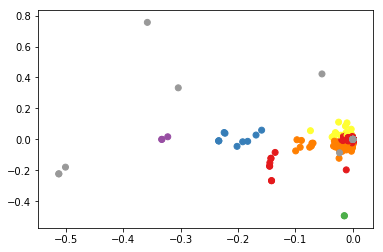

In [18]:
plt.scatter(
    sparse_vec[:,0].tolist()+sparse_mvec[:,0].tolist(),
    sparse_vec[:,1].tolist()+sparse_mvec[:,1].tolist(),
    c=y_kmeans.tolist()+m_preset,cmap=plt.cm.Set1)
plt.show()

**6. Then re-compute the distance score using the new equation.**

In [19]:
cluster_size = [len(y_dist[p]) for p in y_dist.keys()]
mdistances = []
mr, mc = sparse_vec.shape
for i in range(mr):
    tmp_dist = 0.
    for j in range(7):
        tmp_dist += cluster_size[j]/sum(cluster_size) * distance.euclidean(sparse_vec[i,:],kmeans.cluster_centers_[j])
    mdist = []
    for j in range(sparse_mvec.shape[0]):
        mdist.append( distance.euclidean(sparse_vec[i,:],sparse_mvec[j,:]) )
    tmp_dist += sum(mdist)/len(mdist)
    mdistances.append((i,tmp_dist))

In [20]:
sorted_d = sorted(mdistances, key=lambda p:p[1], reverse=True)

In [21]:
for i in range(100):
    ind,sc = sorted_d[i]
    if dt_vec[ind,5]==0:
#     if True:
        print("i={}, score={:.2f}, vec={}, {}".format(ind, sc, dt_vec[ind,:].round(decimals=1), dt_commit[ind]))

i=14623, score=0.26, vec=[ 6  2  0  0  0  0 56  6  0], https://github.com/kapoorutd/Telegram/commit/c939a0778e2a91825328f91d6d6450c42d2bef29
i=666, score=0.21, vec=[ 0  0  0  0  0  0  0  4 19], https://github.com/mbagliojr/sugar/commit/0ef60527c8bf16d6f6b3e6992994c79a68c98892
i=1561, score=0.21, vec=[ 0  0  0  0  0  0  0  0 18], https://github.com/agrosner/ActiveAndroid/commit/bedb34182d491ac89647bc477eda2e161a0b2f6e
i=600, score=0.21, vec=[ 0  0  0  0  0  0  0  0 17], https://github.com/bpappin/sugar/commit/487c11f79ea95d25cbb1255b6aba05e1c8afde07
i=3155, score=0.20, vec=[ 0  0  0  0  0  0  0  0 16], https://github.com/ZacSweers/dagger/commit/8f015262526e88677231b566fe5d94553103b19a
i=4549, score=0.20, vec=[ 0  0  0  0  0  0  0  0 16], https://github.com/ze-pequeno/dagger/commit/8f015262526e88677231b566fe5d94553103b19a
i=1515, score=0.20, vec=[ 0  0  0  0  0  0  0  0 14], https://github.com/Sebbia/ActiveAndroid/commit/6f9944d199644dea4166ab472ae83cf755462c68
i=2063, score=0.20, vec=[ 

### SparsePCA + DBSCAN

In [22]:
sparse_pca = SparsePCA(n_components=2)
sparse_pca.fit(dt_vec)

/Users/joseph/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


SparsePCA(U_init=None, V_init=None, alpha=1, max_iter=1000, method='lars',
     n_components=2, n_jobs=None, normalize_components=False,
     random_state=None, ridge_alpha=0.01, tol=1e-08, verbose=False)

In [23]:
sparse_vec = sparse_pca.transform(dt_vec)

In [24]:
dbscan = DBSCAN(eps=0.005, min_samples=20).fit(sparse_vec)

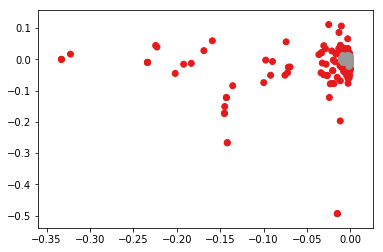

In [25]:
plt.scatter(sparse_vec[:,0],sparse_vec[:,1],c=dbscan.labels_,cmap=plt.cm.Set1)
plt.show()

In [26]:
set(dbscan.labels_)

{-1, 0}

In [27]:
dbscan.labels_.tolist().count(-1), dbscan.labels_.tolist().count(0), dbscan.labels_.tolist().count(1), dbscan.labels_.tolist().count(2)

(105, 16560, 0, 0)

In [28]:
for i in range(len(dbscan.labels_)):
    if dbscan.labels_[i]==-1:
        if dt_vec[i,5]==0:
            print("i={}, vec={}, {}".format(i, dt_vec[i,:].round(decimals=1), dt_commit[i]))

i=600, vec=[ 0  0  0  0  0  0  0  0 17], https://github.com/bpappin/sugar/commit/487c11f79ea95d25cbb1255b6aba05e1c8afde07
i=666, vec=[ 0  0  0  0  0  0  0  4 19], https://github.com/mbagliojr/sugar/commit/0ef60527c8bf16d6f6b3e6992994c79a68c98892
i=1561, vec=[ 0  0  0  0  0  0  0  0 18], https://github.com/agrosner/ActiveAndroid/commit/bedb34182d491ac89647bc477eda2e161a0b2f6e
i=3155, vec=[ 0  0  0  0  0  0  0  0 16], https://github.com/ZacSweers/dagger/commit/8f015262526e88677231b566fe5d94553103b19a
i=4549, vec=[ 0  0  0  0  0  0  0  0 16], https://github.com/ze-pequeno/dagger/commit/8f015262526e88677231b566fe5d94553103b19a
i=13893, vec=[ 0  1  0  0  0  0 17  7  0], https://github.com/ZuzooVn/Telegram/commit/fd60b03279381e0cc3f23f6fe8cb001101ce6c0b
i=13910, vec=[ 0  0  0  0  0  0 14  0  0], https://github.com/rafalense/Plus-Messenger/commit/30f85a08f387cc2f32c2db5c8dca128127a5a1d3
i=14100, vec=[ 0  0  0  0  0  0 20 11  0], https://github.com/kapoorutd/Telegram/commit/d8f812b56a0a1824886